In [3]:
X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [4]:
import statsmodels.api as am

X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

In [5]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [6]:
w

array(86.44794301)

In [7]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

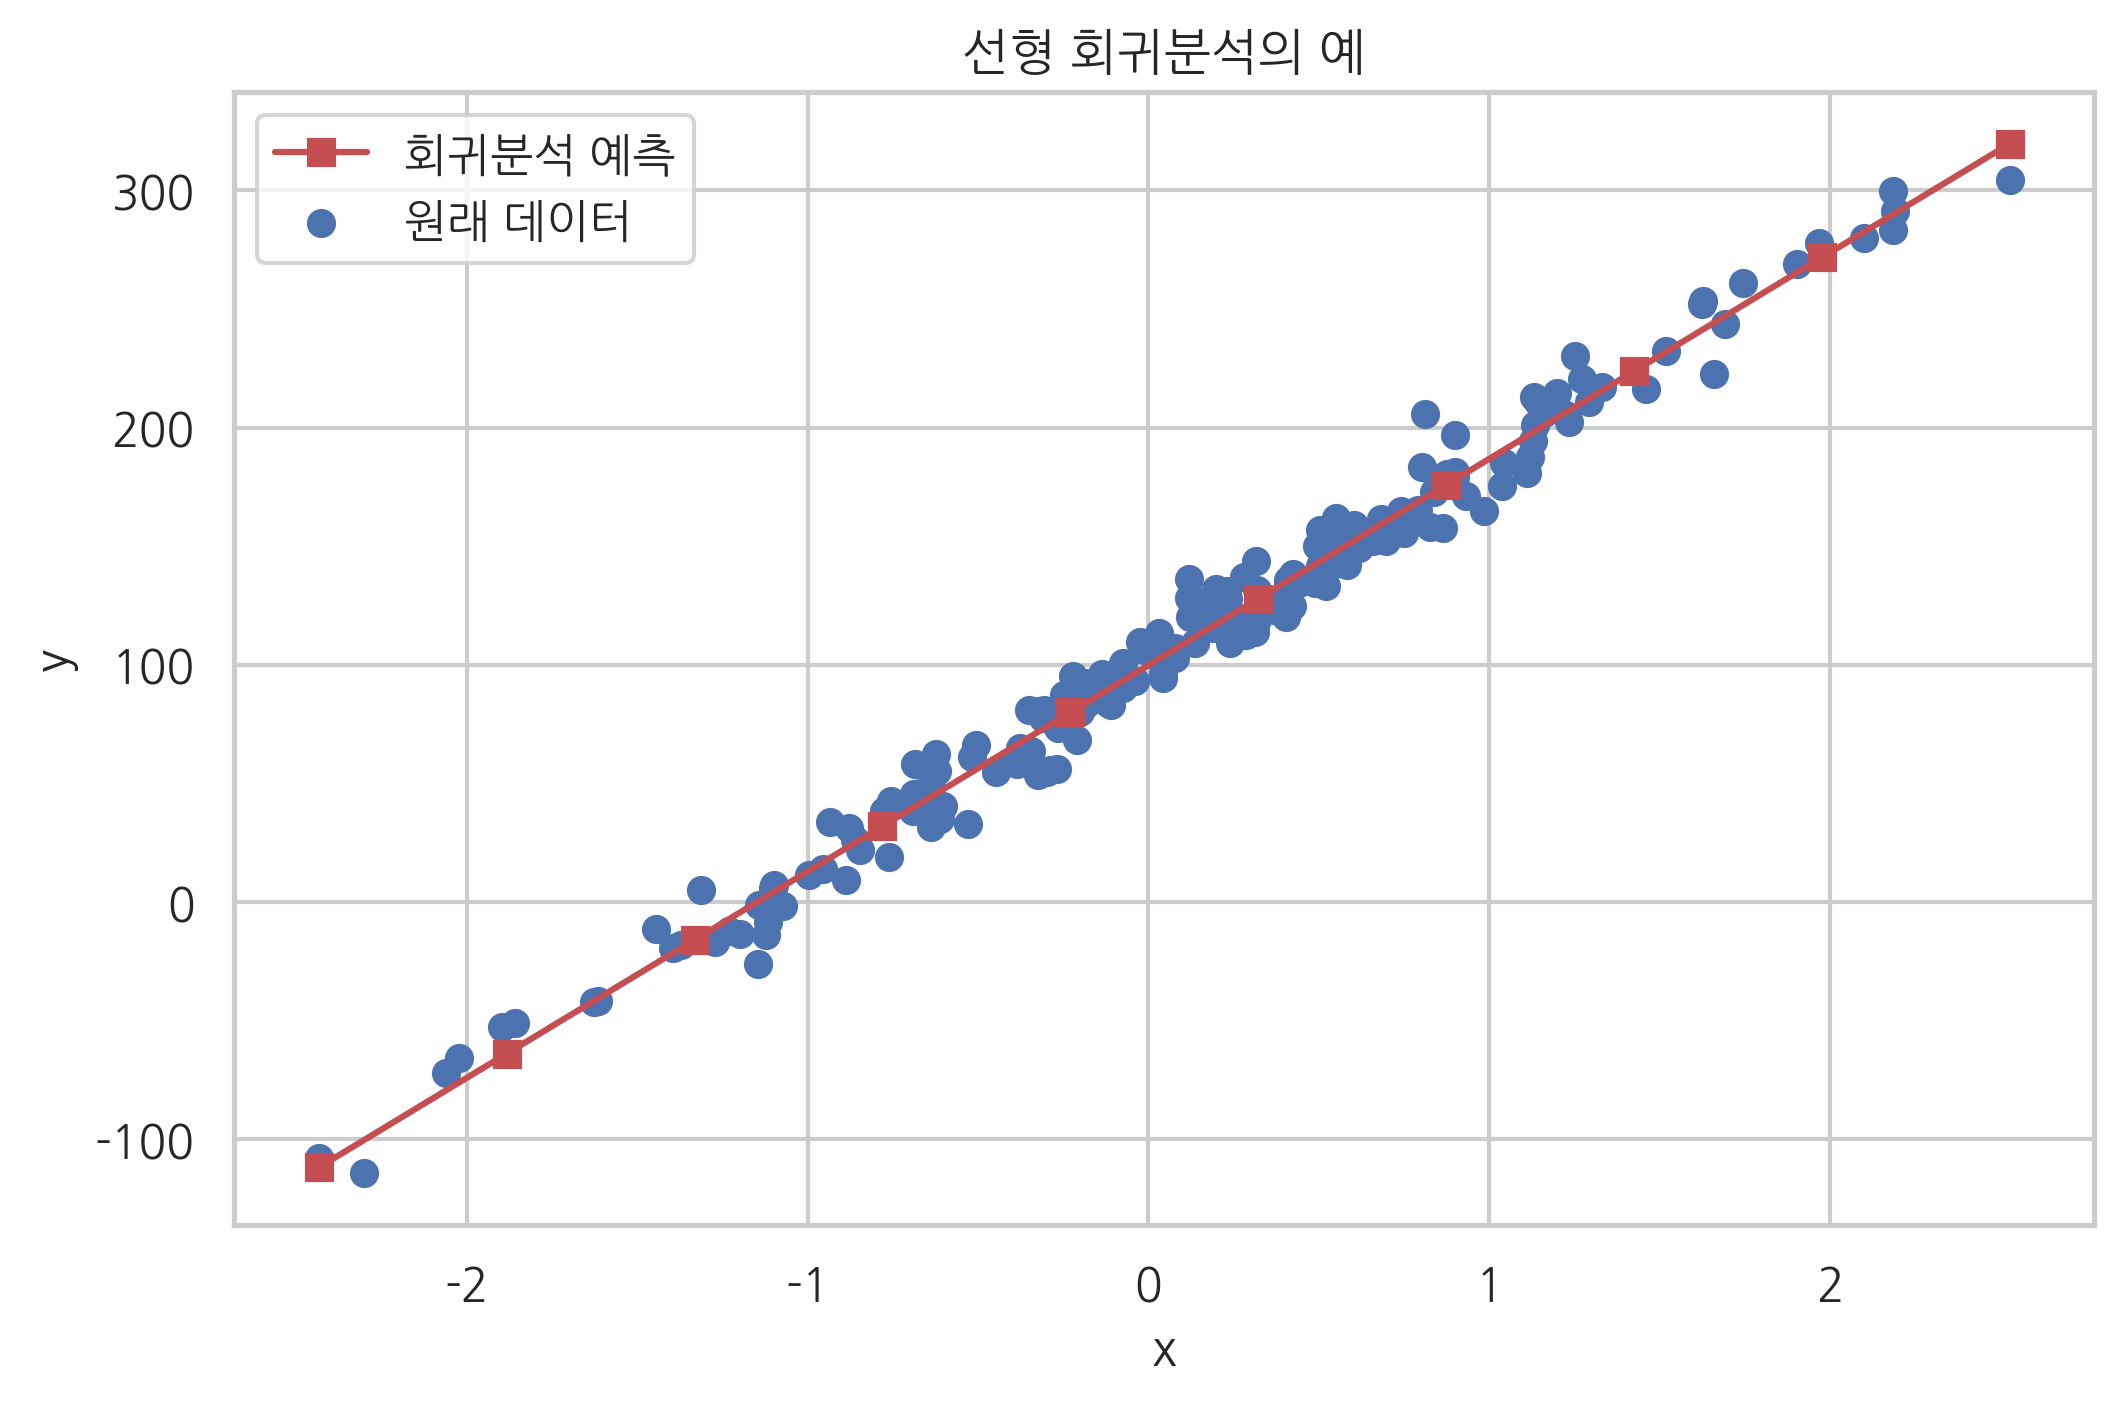

In [8]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0,y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


In [10]:
model.predict([[-2],[-1],[0],[1],[2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

In [12]:
df = pd.DataFrame({"x":X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [13]:
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()

In [14]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

In [15]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Sat, 17 Apr 2021   Prob (F-statistic):          8.17e-182
Time:                        18:14:33   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [16]:
result.predict({"x": [-2,-1,0,1,2]})

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [17]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

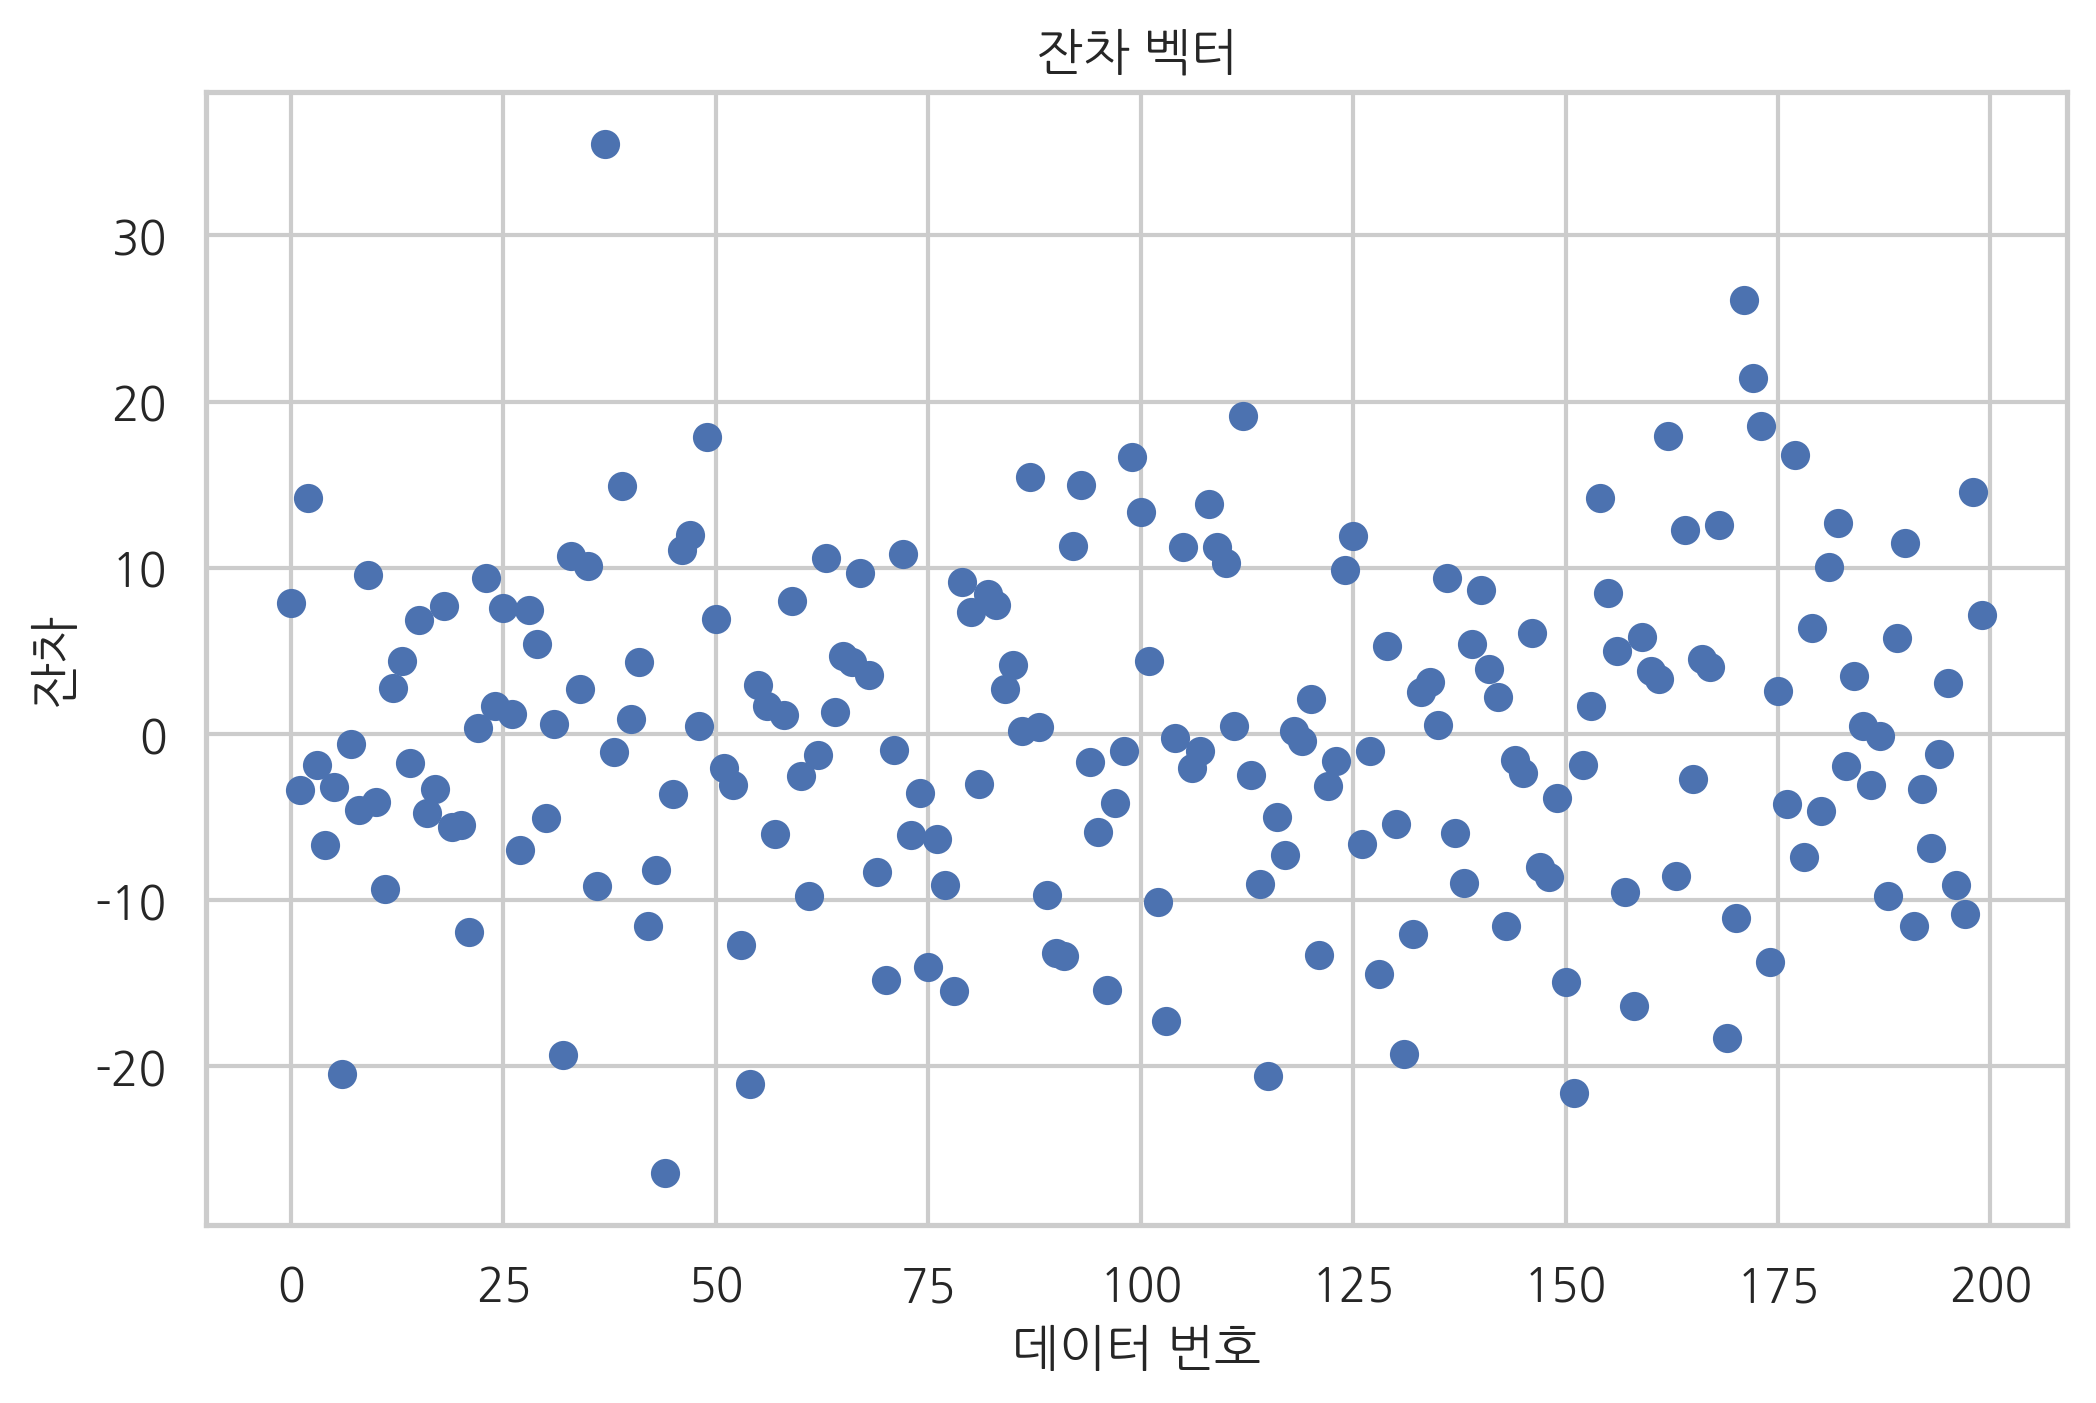

In [18]:
result.resid.plot(style="o")
plt.title("잔차 벡터")
plt.xlabel("데이터 번호")
plt.ylabel("잔차")
plt.show()

In [19]:
result.resid.sum()

6.572520305780927e-13

In [20]:
result.predict({"x": X0.mean()})

0    109.069351
dtype: float64

In [21]:
y.mean()

109.06935068170773

In [23]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 17 Apr 2021   Prob (F-statistic):          6.72e-135
Time:                        18:20:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [31]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
dfX0 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(diabetes.target, columns=["TARGET"])

model_diabetes2 = sm.OLS(dfy, dfX)
result_diabetes2 = model_diabetes2.fit()
print(result_diabetes2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           3.83e-62
Time:                        21:11:21   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

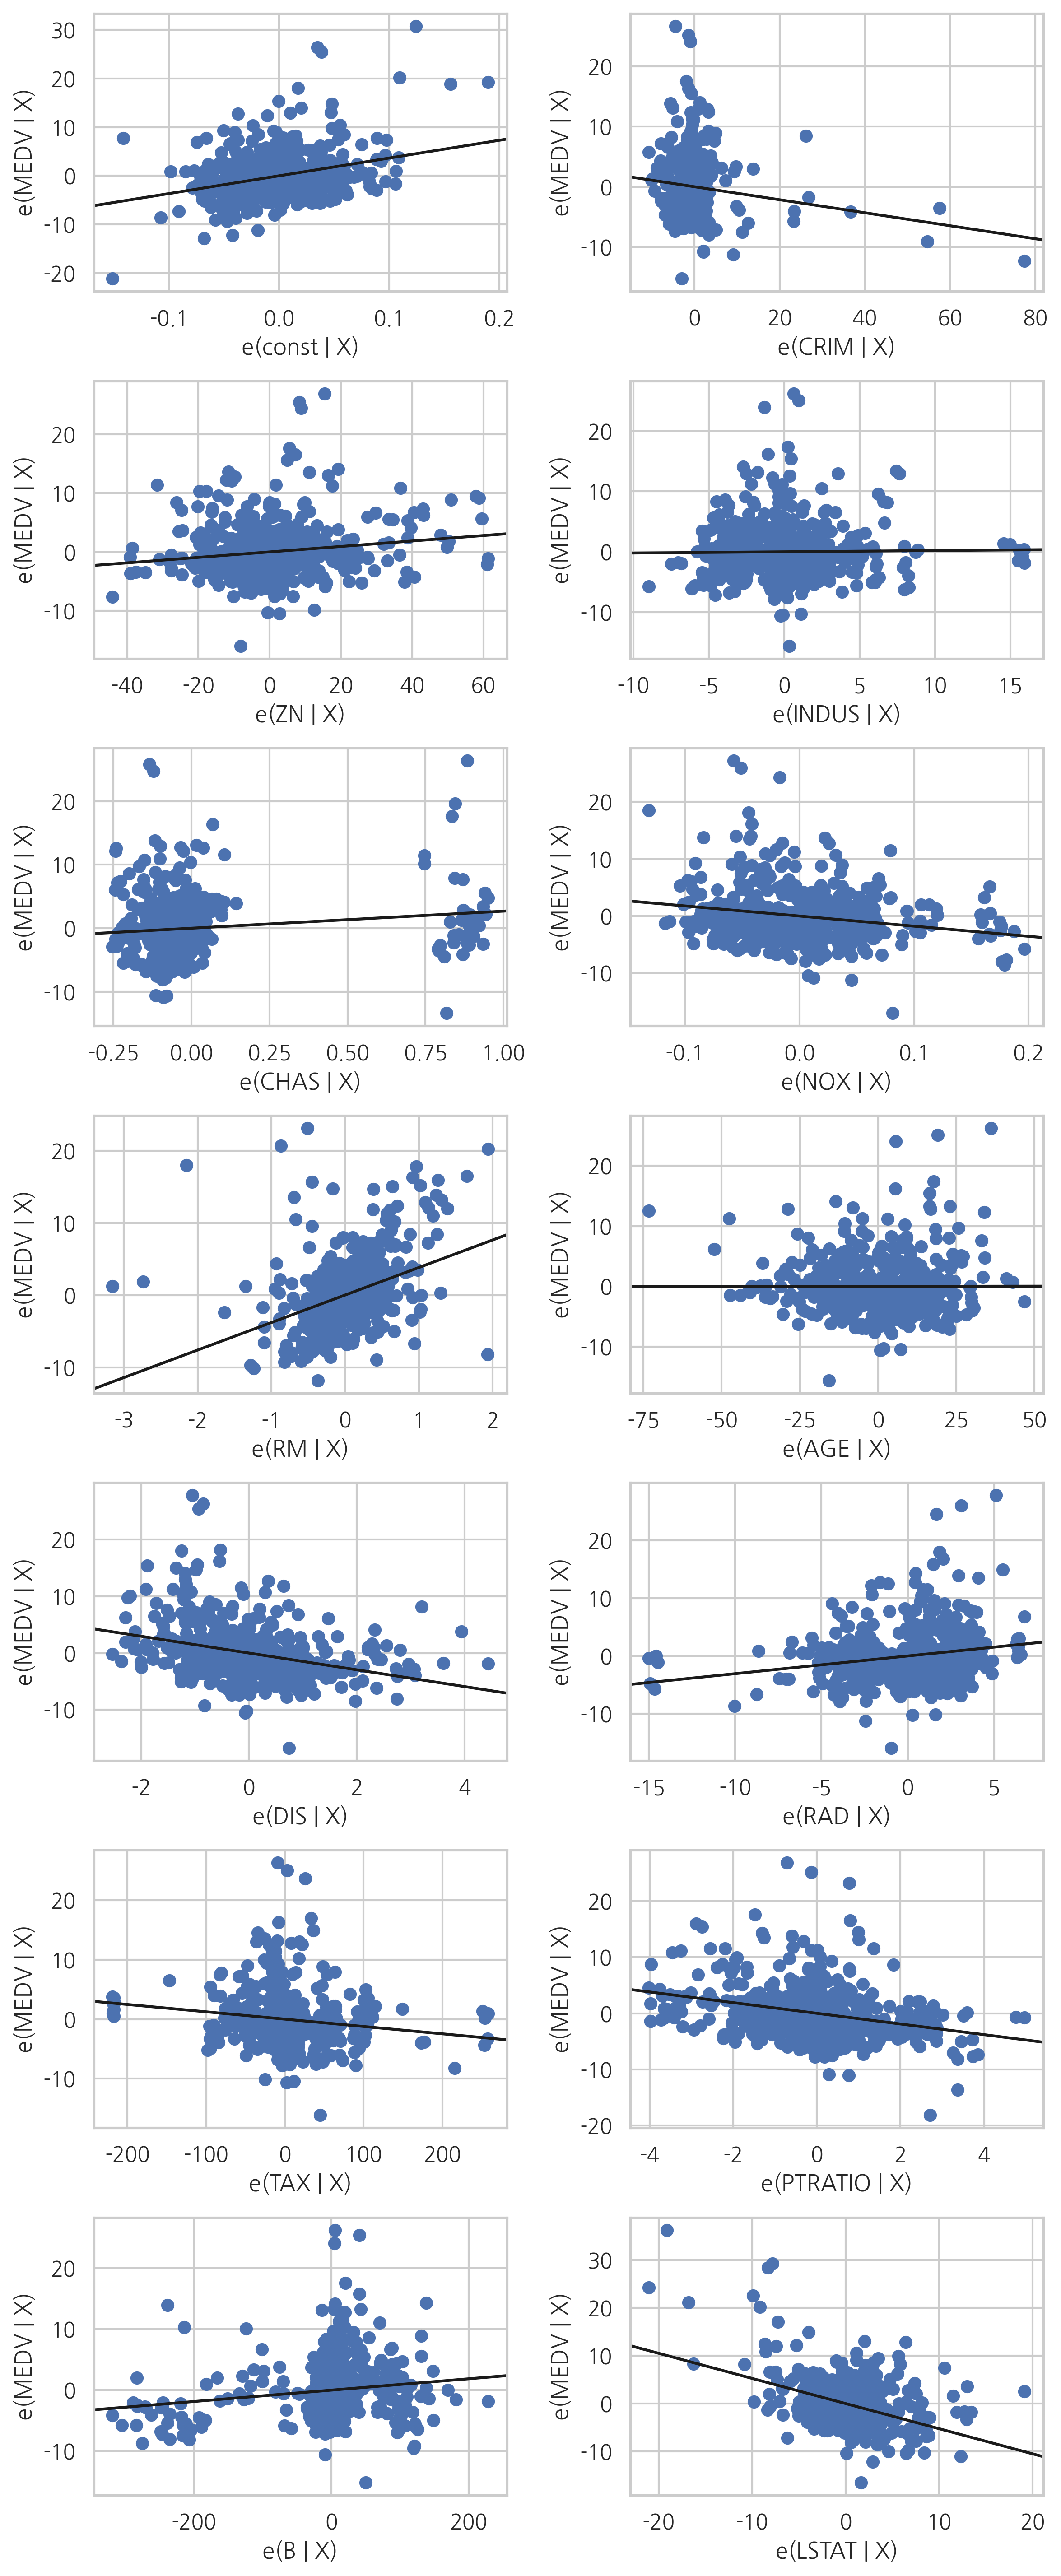

In [29]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston2, fig=fig)
fig.suptitle("")
plt.show()

PatsyError: Error evaluating factor: NameError: name 'ZN' is not defined
    MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT
                ^^